In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
df = pd.read_csv('Algerian_cleaned.csv')
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [11]:
#removing day,month,and year 
df.drop(['day','month','year'],axis=1,inplace=True)

In [15]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [17]:
# fix the values of Classes feature
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [19]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [21]:
# indpendent and dependent feature 

X = df.drop('FWI',axis=1)
y= df['FWI']

In [23]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [25]:
# train_test splitiing 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [29]:
#feature selection based on correlation 
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


#### check multicollinearity 


### what meant by multicollinearity 

Multicollinearity happens when two or more independent variables in a regression model are highly related (correlated) to each other. This makes it hard for the model to determine the individual effect of each variable on the dependent variable.

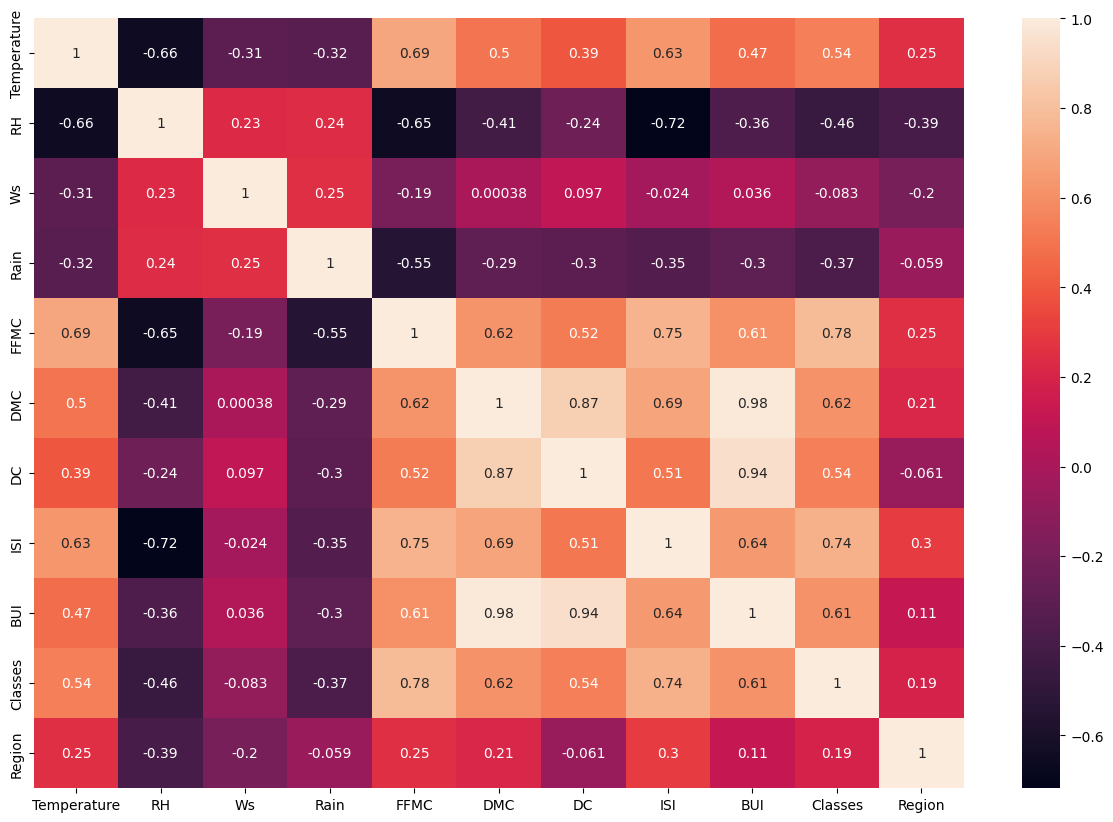

In [33]:
plt.figure(figsize=(15,10))
corr = X_train.corr()
sns.heatmap(corr,annot = True )
plt.show()

In [34]:
dd = X_train.corr()

In [35]:
dd

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [36]:
dd.iloc[7,6]

0.5137007275435098

In [37]:
def correlation(dataset,threshold):
    cols_set = set()
    col_matrix = dataset.corr()
    for i in range(len(col_matrix.columns)):
        for j in range(i):
            if abs(col_matrix.iloc[i,j]) > threshold:
                col_name = col_matrix.columns[i]
                cols_set.add(col_name)
    return cols_set

In [38]:
## threshold --- domain expertise 
corr_features = correlation(X_train,0.85)


In [39]:
#drop features when correlation is more than 0.85

X_train.drop(corr_features,axis=1,inplace = True)
X_test.drop(corr_features,axis=1,inplace=True)

In [47]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

### feature scaling 


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Box plot to understand effect of standard scaler

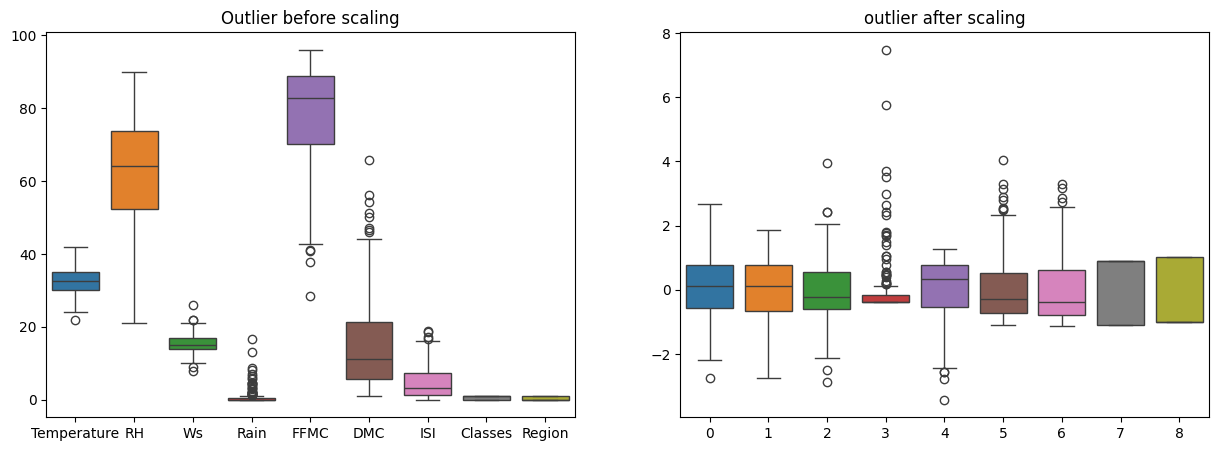

In [53]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Outlier before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('outlier after scaling')
plt.show()

### LINEAR REGRESSION MODEL 

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linRegression = LinearRegression()
linRegression.fit(X_train_scaled,y_train)
y_pred = linRegression.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f' mae : {mae} , r2 : {score}')

 mae : 0.5468236465249976 , r2 : 0.9847657384266951


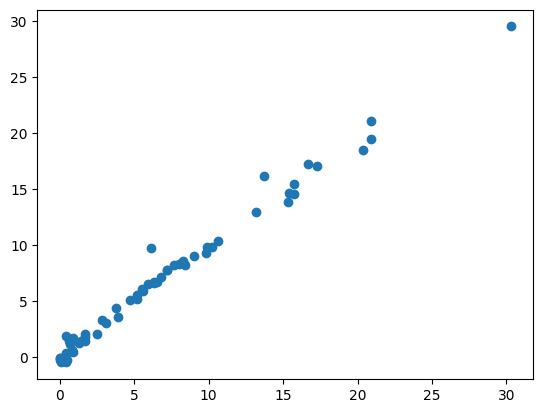

In [56]:
plt.scatter(y_test,y_pred)
plt.show()

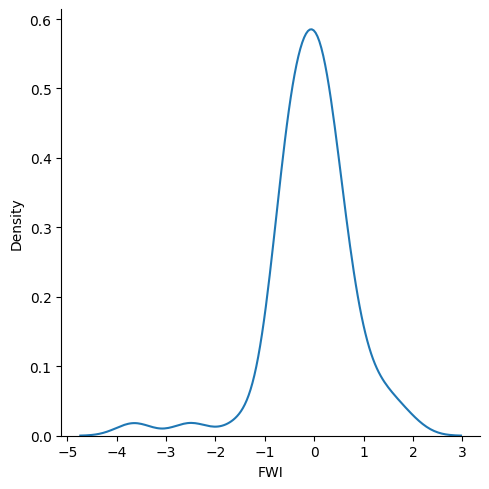

In [57]:
residual = y_test-y_pred
sns.displot(residual , kind='kde')
plt.show()

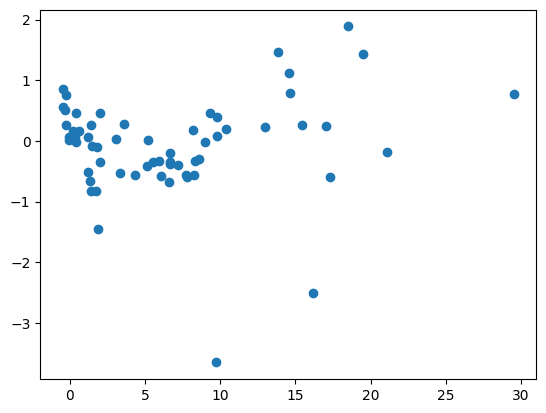

In [58]:
plt.scatter(y_pred,residual)
plt.show()

### MODEL IS BEST 

## Ridge regression 

 mae : 0.5642305340105693 , r2 : 0.9842993364555513


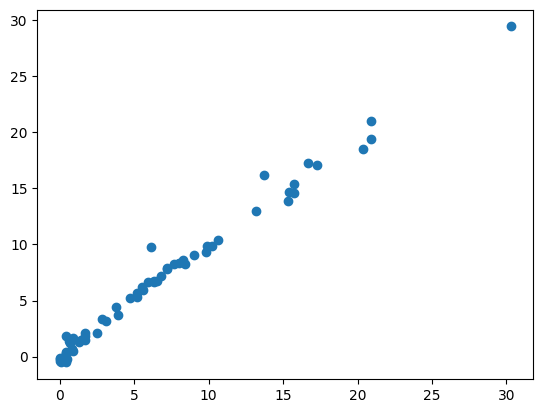

In [64]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridRegression = Ridge()
ridRegression.fit(X_train_scaled,y_train)
y_pred = ridRegression.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f' mae : {mae} , r2 : {score}')
plt.scatter(y_test,y_pred)
plt.show()

## Lasso regression

 mae : 1.1331759949144087 , r2 : 0.9492020263112388


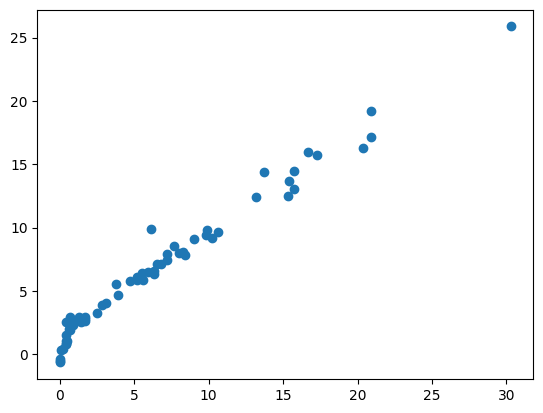

In [67]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassoRegression = Lasso()
lassoRegression.fit(X_train_scaled,y_train)
y_pred = lassoRegression.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f' mae : {mae} , r2 : {score}')
plt.scatter(y_test,y_pred)
plt.show()

## ElasticNet regression

 mae : 1.8822353634896 , r2 : 0.8753460589519703


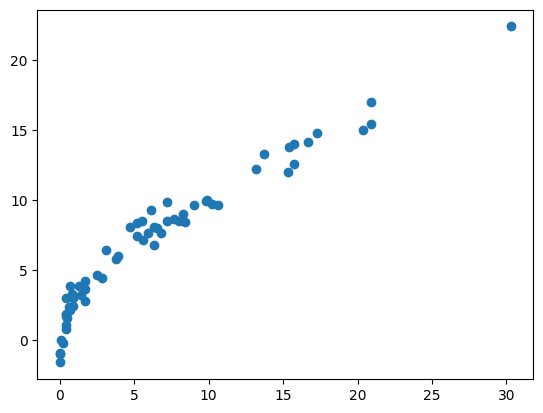

In [70]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticRegression = ElasticNet()
elasticRegression.fit(X_train_scaled,y_train)
y_pred = elasticRegression.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f' mae : {mae} , r2 : {score}')
plt.scatter(y_test,y_pred)
plt.show()

# Cross Validation Lasso

In [73]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)


LassoCV(cv=5)

In [82]:
lassocv.predict(X_train_scaled)

array([ 1.12352400e+00, -4.32008727e-01,  2.18421021e+01,  3.39660772e+00,
        1.74184330e+00,  9.66005015e+00,  6.96880373e+00,  1.02965405e+01,
       -7.78961756e-01,  8.06547464e+00,  1.24207104e+01,  1.51136178e+01,
        1.22695720e+01, -2.81803691e-01,  1.40985530e+00,  1.65178975e-01,
        3.00233768e+00,  1.36917427e+01, -1.12261821e+00,  9.64073506e+00,
        5.61660850e+00,  6.73146518e+00,  9.80084592e+00,  2.89949749e+01,
        9.78803392e-01, -1.01201311e-01,  9.52578662e-01,  7.11324647e+00,
        5.34530092e+00,  3.69725221e+00, -3.86941888e-01,  9.86118836e-01,
        1.94897513e+00,  4.51170472e+00,  6.74026227e-02, -2.40791383e-01,
        1.94828224e+01,  4.42057726e+00,  1.70403944e+00,  1.40427388e+01,
        1.19717469e+01,  1.42000219e+01,  1.51148657e+00,  1.41124158e+01,
        1.24618626e+01,  3.59010918e+00,  5.66260658e-01,  2.49982708e+01,
        4.60080910e-01, -3.87608783e-01,  1.30608252e+01,  4.13565611e+00,
       -3.09162774e-01,  

## WHAT alpha value selected 

In [85]:
lassocv.alpha_

0.05725391318234408

## no of alpha values [ check cheythath]

In [88]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [90]:
len(lassocv.alphas_)

100

In [94]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

### finding accuracy 

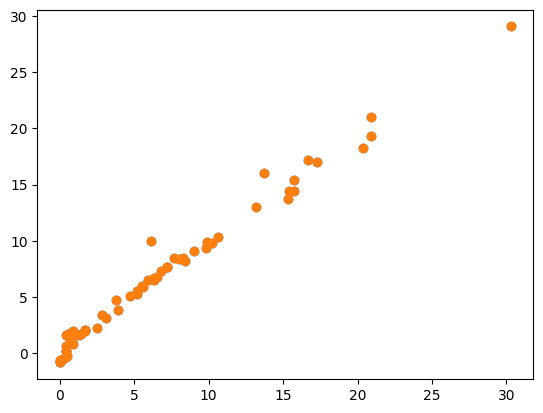

In [123]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.show()

In [125]:
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f' mae : {mae} , r2 : {score}')

 mae : 0.6199701158263434 , r2 : 0.9820946715928274


# cross validation ridgeCv

 mae : 0.5642305340105693 , r2 : 0.9842993364555513


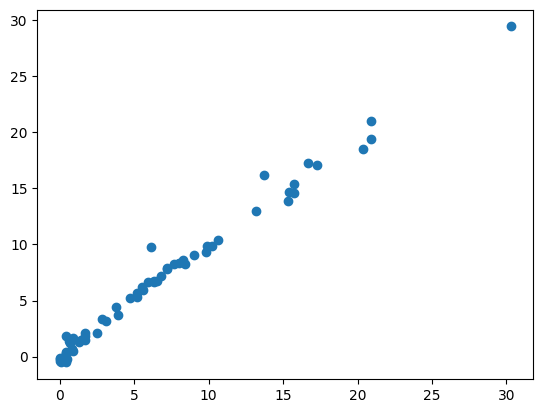

In [128]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f' mae : {mae} , r2 : {score}')
plt.show()

In [132]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [134]:
ridgecv.alpha_

1.0

In [136]:
ridgecv.best_score_

0.9549267274722449

In [138]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

# Cross validation elasticNet

 mae : 0.6575946731430904 , r2 : 0.9814217587854941


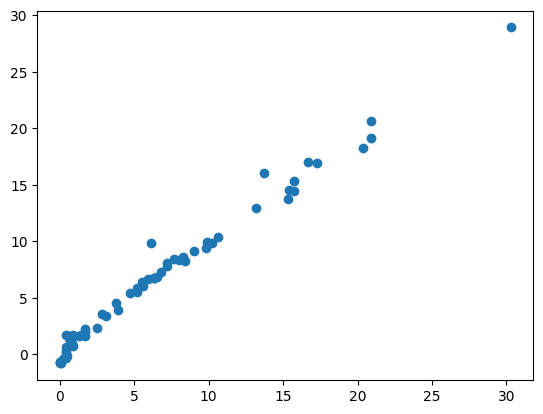

In [141]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred = elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f' mae : {mae} , r2 : {score}')
plt.show()

In [143]:
elasticcv.alpha_

0.04311146156383891

In [145]:
elasticcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11